In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [19]:
data = pd.read_excel("/Users/claireleblanc/Downloads/media-2 (1).xlsx")
data = data[data["set"] != 'control']

In [25]:
hydrophobics = ['A', 'V', 'I', 'L', 'M', 'F', 'Y', 'W']

In [53]:
data["hydrophobic_end"] = [s[-1] in hydrophobics for s in data['aa']]

# data["hydrophobic"] = [(s[-1] in hydrophobics) and (s[-2] in hydrophobics) for s in data['aa']]
# data["hydrophobic_end"] = [(s[-1] in hydrophobics) and (s[-2] in hydrophobics) and (s[-3] in hydrophobics) for s in data['aa']]
data["hydrophobic_anywhere"] = [True if re.search("[AVILMFYW][AVILMFYW][AVILMFYW]", s) else False for s in data['aa']]
data["hydrophobic_anywhere"] = [True if re.search("[AVILMFYW]", s) else False for s in data['aa']]

In [36]:

if re.search("[AVILMFYW][AVILMFYW][AVILMFYW]", "RWWR"): 
    print(True)

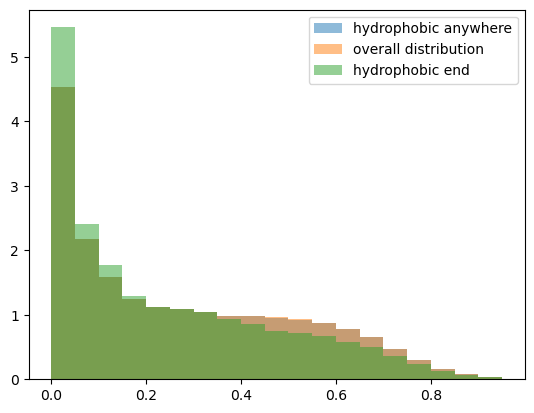

In [54]:
plt.hist(data[data["hydrophobic_anywhere"]]['abundance_score'], density=True, alpha=0.5, bins=np.arange(0,1,0.05), label="hydrophobic anywhere")
plt.hist(data['abundance_score'], alpha=0.5, density=True, bins=np.arange(0,1,0.05), label="overall distribution")
plt.hist(data[data["hydrophobic_end"]]['abundance_score'], density=True, alpha=0.5, label="hydrophobic end", bins=np.arange(0,1,0.05))

plt.legend()